In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web


In [3]:
# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
train_data = web.DataReader('BBCA.JK', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,3,31)) 

# get 2020 data to present date to test the SVM model
# test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,9,3)) 

In [4]:
train_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1010.0,965.0,1010.0,1010.0,77812500.0,855.341309
2010-01-05,1020.0,990.0,1020.0,1020.0,44442500.0,863.810120
2010-01-06,1020.0,990.0,990.0,990.0,27782500.0,838.403931
2010-01-07,995.0,965.0,995.0,995.0,38632500.0,842.638245
2010-01-08,995.0,970.0,970.0,970.0,27427500.0,821.466492
...,...,...,...,...,...,...
2019-03-26,5510.0,5455.0,5480.0,5470.0,19895500.0,5204.817383
2019-03-27,5510.0,5460.0,5510.0,5485.0,17804500.0,5219.089844
2019-03-28,5485.0,5425.0,5460.0,5470.0,32187500.0,5204.817383


In [5]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,6750.0,6690.0,6720.0,6735.0,27300000.0,6487.538574
2020-01-07,6770.0,6730.0,6735.0,6740.0,45022500.0,6492.354492
2020-01-08,6745.0,6670.0,6670.0,6680.0,53692500.0,6434.559570
2020-01-09,6755.0,6730.0,6740.0,6740.0,40363500.0,6492.354492
2020-01-10,6825.0,6710.0,6765.0,6725.0,73362000.0,6477.905273
...,...,...,...,...,...,...
2021-08-30,6580.0,6520.0,6530.0,6565.0,74564500.0,6543.043457
2021-08-31,6570.0,6515.0,6520.0,6550.0,115373500.0,6528.093750
2021-09-01,6600.0,6535.0,6550.0,6565.0,67362500.0,6543.043457


In [6]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [7]:
train_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1010.0,965.0,1010.0,1010.0,77812500.0,855.341309
2010-01-05,1020.0,990.0,1020.0,1020.0,44442500.0,863.810120
2010-01-06,1020.0,990.0,990.0,990.0,27782500.0,838.403931
2010-01-07,995.0,965.0,995.0,995.0,38632500.0,842.638245
2010-01-08,995.0,970.0,970.0,970.0,27427500.0,821.466492
...,...,...,...,...,...,...
2019-03-26,5510.0,5455.0,5480.0,5470.0,19895500.0,5204.817383
2019-03-27,5510.0,5460.0,5510.0,5485.0,17804500.0,5219.089844
2019-03-28,5485.0,5425.0,5460.0,5470.0,32187500.0,5204.817383


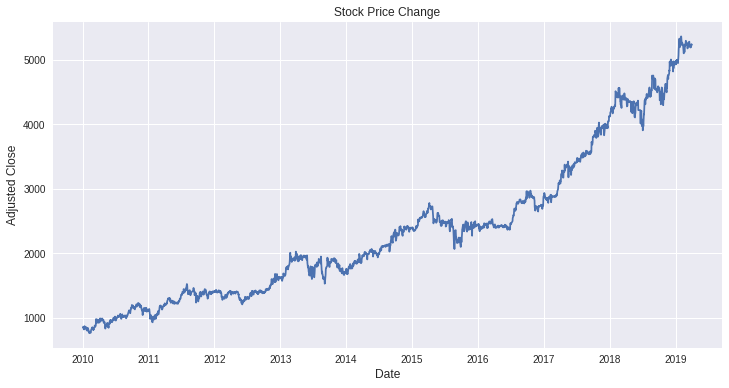

In [8]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

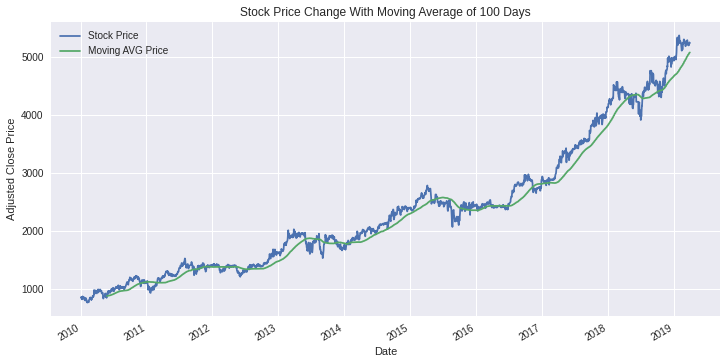

In [9]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [10]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,High,Low,Open,Close,Volume,Adj Close
0,733776.0,1010.0,965.0,1010.0,1010.0,77812500.0,855.341309
1,733777.0,1020.0,990.0,1020.0,1020.0,44442500.0,863.810120
2,733778.0,1020.0,990.0,990.0,990.0,27782500.0,838.403931
3,733779.0,995.0,965.0,995.0,995.0,38632500.0,842.638245
4,733780.0,995.0,970.0,970.0,970.0,27427500.0,821.466492
...,...,...,...,...,...,...,...
2292,737144.0,5510.0,5455.0,5480.0,5470.0,19895500.0,5204.817383
2293,737145.0,5510.0,5460.0,5510.0,5485.0,17804500.0,5219.089844
2294,737146.0,5485.0,5425.0,5460.0,5470.0,32187500.0,5204.817383
2295,737147.0,5530.0,5460.0,5515.0,5510.0,36234000.0,5242.878418


In [11]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [12]:
SVR_linear = SVR(kernel= 'linear', C=0.01)
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
SVR_linear_train

array([-647.71329916, -646.03890836, -644.36455572, ..., 4994.45470488,
       4996.12933218, 5001.15206397])

In [14]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.15)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
SVR_rbfk_train

array([1016.73012736,  863.70970448,  838.50388525, ..., 5113.31577468,
       4819.59670617, 3704.61143292])

In [16]:
SVR_poly = SVR(kernel= 'poly', C=1, degree=1)
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
SVR_poly_train

array([ 841.11646829,  841.91606075,  842.7156539 , ..., 3535.74521409,
       3536.54480705, 3538.94358678])

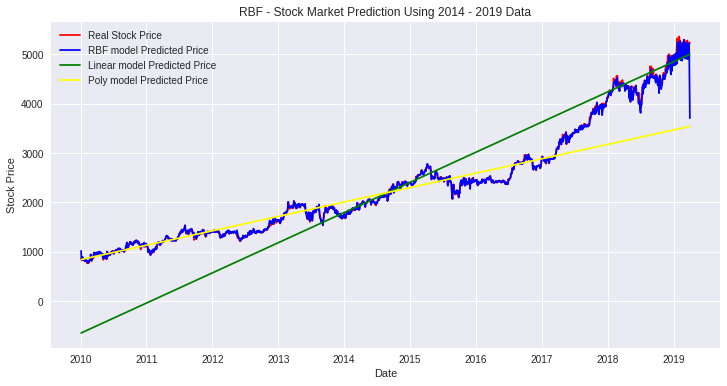

In [18]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [20]:
test_indxed_dates

,Date,High,Low,Open,Close,Volume,Adj Close
0,737430.0,6750.0,6690.0,6720.0,6735.0,27300000.0,6487.538574
1,737431.0,6770.0,6730.0,6735.0,6740.0,45022500.0,6492.354492
2,737432.0,6745.0,6670.0,6670.0,6680.0,53692500.0,6434.559570
3,737433.0,6755.0,6730.0,6740.0,6740.0,40363500.0,6492.354492
4,737434.0,6825.0,6710.0,6765.0,6725.0,73362000.0,6477.905273
...,...,...,...,...,...,...,...
399,738032.0,6580.0,6520.0,6530.0,6565.0,74564500.0,6543.043457
400,738033.0,6570.0,6515.0,6520.0,6550.0,115373500.0,6528.093750
401,738034.0,6600.0,6535.0,6550.0,6565.0,67362500.0,6543.043457
402,738035.0,6575.0,6455.0,6525.0,6540.0,53257000.0,6518.126953


In [21]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [22]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.15)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
SVR_linear = SVR(kernel= 'linear', C= 0.01)
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
SVR_poly = SVR(kernel= 'poly', C= 1, degree=1)
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


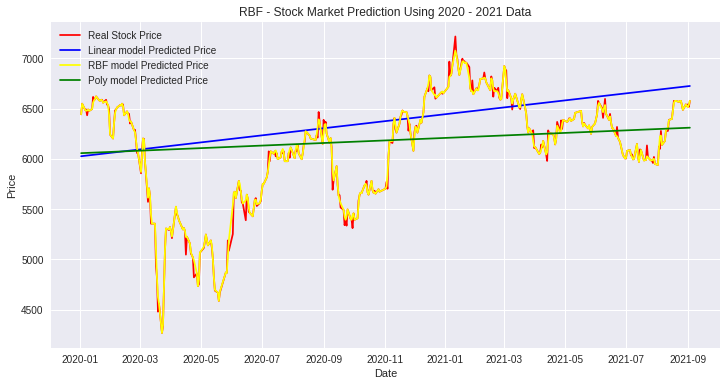

In [ ]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))

#intercept
print(SVR_rbfk.intercept_)


SVR RBF Train RMSE: 54.18
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 13.44
SVR RBF Test RMSE: 42.04
SVR RBF Test R2 Score: 0.99
SVR RBF Test MAE Score: 17.84
[6089.014661]


In [ ]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

#intercept
print(SVR_linear.intercept_)

SVR Linear Train RMSE: 682.84
SVR Linear Train R2 Score: 0.66
SVR Linear Train MAE Score: 539.93
SVR Linear Test RMSE: 571.37
SVR Linear Test R2 Score: -0.08
SVR Linear Test MAE Score: 455.51
[-839219.11382717]


In [ ]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

#intercept
print(SVR_poly.intercept_)

SVR Poly Train RMSE: 520.55
SVR Poly Train R2 Score: 0.80
SVR Poly Train MAE Score: 310.65
SVR Poly Test RMSE: 529.37
SVR Poly Test R2 Score: 0.07
SVR Poly Test MAE Score: 409.37
[-300329.44213867]
